In [8]:
from laserembeddings import Laser
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle as pk
from embedder import Embedder

laser = Laser()
pca_1 = PCA(n_components=2)
pca_2 = PCA(n_components=2)

In [9]:
f1 = open("final_data/en-hi/train.hi", "r")
f2 = open("final_data/en-hi/train.en", "r")

embeddings_1 = []
embeddings_2 = []

for i in range(4096):
    embedding_1 = laser.embed_sentences([f1.readline()], lang=['hi'])
    embeddings_1.append(embedding_1)
    embedding_2 = laser.embed_sentences([f2.readline()], lang=['en'])
    embeddings_2.append(embedding_2)
    clear_output()
    print(i)

embeddings_1 = np.array([embeddings_1]).squeeze()
embeddings_2 = np.array([embeddings_2]).squeeze()

4095


In [10]:
pca_1.fit(embeddings_1)
pca_2.fit(embeddings_2)

PCA(n_components=2)

In [11]:
f1 = open("final_data/en-hi/train.hi", "r")
f2 = open("final_data/en-hi/train.en", "r")

pairs = []
x_1 = []
y_1 = []
x_2 = []
y_2 = []
e = Embedder("pca_hi.pkl", "pca_en.pkl")

for i in range(1024):
    # embedding_1 = laser.embed_sentences([f1.readline()], lang=['hi'])
    # embedding_2 = laser.embed_sentences([f2.readline()], lang=['en'])
    # point_1 = pca_1.transform(embedding_1)
    # # x_1.append(point_1[0, 0])
    # # y_1.append(point_1[0, 1])
    # point_2 = pca_2.transform(embedding_2)
    # # x_2.append(point_2[0, 0])
    # # y_2.append(point_2[0, 1])
    point_1, point_2 = e.embed(f1.readline(), f2.readline())
    # pair = (point_1[0,0], point_1[0,1], point_2[0,0], point_2[0,1], np.linalg.norm(point_1 - point_2))
    pair = (point_1[0], point_1[1], point_2[0], point_2[1], np.linalg.norm(point_1 - point_2))
    pairs.append(pair)

pairs.sort(key = lambda x: x[-1])

for i in range(10):
    x_1.append(pairs[i][0])
    y_1.append(pairs[i][1])
    x_2.append(pairs[i][2])
    y_2.append(pairs[i][3])

c:\Anaconda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PCA from version 1.2.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [12]:
x_1

[-0.13036603,
 0.055399343,
 0.2705235,
 -0.2293999,
 0.113123804,
 -0.0879422,
 -0.07506828,
 0.036164947,
 0.21446618,
 -0.054348167]

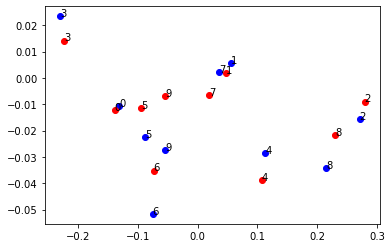

In [13]:
plt.scatter(x_1, y_1, c='b')
plt.scatter(x_2, y_2, c='r')
for i in range(len(x_1)):
    plt.annotate(str(i), (x_1[i], y_1[i]))
    plt.annotate(str(i), (x_2[i], y_2[i]))
    
plt.show()

In [14]:
pk.dump(pca_2, open("pca_en.pkl","wb"))

In [2]:
from embedder import Embedder
e = Embedder("pca_hi.pkl", "pca_en.pkl")

c:\Anaconda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PCA from version 1.2.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
e.embed("जिसके जवाब में पाक ने अच्छी शुरुआत की थी", "In reply, Pakistan got off to a solid start")

(array([-0.12455568,  0.03574941], dtype=float32),
 array([-0.11231815, -0.00041717], dtype=float32))